## **Import Cell**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## **Data Load**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/mnist/fashion-mnist_train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/mnist/fashion-mnist_test.csv')

In [ ]:
test_sample,validation_sample=np.split(df_train.sample(frac=1,random_state=42),[int(0.9*len(df_train))])

## **Test Image**

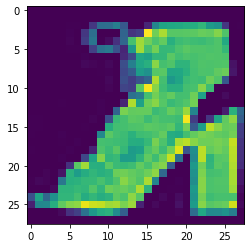

In [ ]:
img=test_sample.iloc[10,1:].values.reshape(28,28)
plt.imshow(img)

In [ ]:
# train_sample
train_x=test_sample.drop(labels='label',axis=1)
train_y=test_sample['label']

validation_x=df_test.drop(labels='label',axis=1)
validation_y=df_test['label']

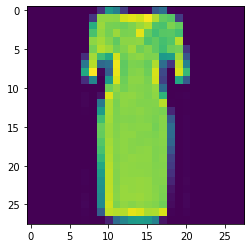

In [ ]:
validation_sample
img=validation_sample.iloc[0,1:].values.reshape((28,28))
# y_op=validation_sample.iloc[0,0]
# print(y_op)
plt.imshow(img)
plt.show()

In [ ]:
print(train_x.shape)
print(train_y.shape)

print(validation_x.shape)
print(validation_y.shape)

(54000, 784)
(54000,)
(10000, 784)
(10000,)


## **Normalisation**

In [ ]:
train_x=train_x.astype('float32')
train_y=train_y.astype('float32')

validation_x=validation_x.astype('float32')
validation_y=validation_y.astype('float32')

train_x=train_x/255.
# train_y=train_y/255.

validation_x=validation_x/255.
# validation_y=validation_y/255.

# one hot encoding
num_garments=10

train_y=tf.keras.utils.to_categorical(train_y,num_classes=num_garments)

validation_y=tf.keras.utils.to_categorical(validation_y,num_classes=num_garments)

In [ ]:
train_y.shape

(54000, 10)

## **ReLU**

###### **No of hidden layers=2**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_1=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h1=model_1.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.6875 - accuracy: 0.7584 - val_loss: 0.5202 - val_accuracy: 0.8201
Epoch 2/10
1688/1688 - 2s - loss: 0.4640 - accuracy: 0.8374 - val_loss: 0.4500 - val_accuracy: 0.8485
Epoch 3/10
1688/1688 - 2s - loss: 0.4291 - accuracy: 0.8494 - val_loss: 0.4229 - val_accuracy: 0.8588
Epoch 4/10
1688/1688 - 2s - loss: 0.4129 - accuracy: 0.8544 - val_loss: 0.4159 - val_accuracy: 0.8567
Epoch 5/10
1688/1688 - 2s - loss: 0.3972 - accuracy: 0.8613 - val_loss: 0.4208 - val_accuracy: 0.8527
Epoch 6/10
1688/1688 - 2s - loss: 0.3830 - accuracy: 0.8652 - val_loss: 0.4167 - val_accuracy: 0.8555
Epoch 7/10
1688/1688 - 2s - loss: 0.3739 - accuracy: 0.8662 - val_loss: 0.3981 - val_accuracy: 0.8636
Epoch 8/10
1688/1688 - 2s - loss: 0.3648 - accuracy: 0.8695 - val_loss: 0.3844 - val_accuracy: 0.8655
Epoch 9/10
1688/1688 - 2s - loss: 0.3581 - accuracy: 0.8729 - val_loss: 0.3882 - val_accuracy: 0.8671
Epoch 10/10
1688/1688 - 2s - loss: 0.3511 - accuracy: 0.8751 - val_loss: 0.4091 - 

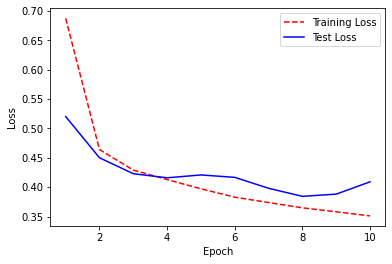

In [ ]:
# Get training and test loss histories
training_loss = h1.history['loss']
test_loss = h1.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


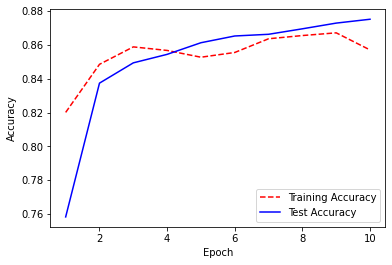

In [ ]:
# Get training and test loss histories
train_accuracy=h1.history['val_accuracy']
test_accuracy=h1.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2** 
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy**

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_2=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h2=model_2.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.5710 - accuracy: 0.8008 - val_loss: 0.4640 - val_accuracy: 0.8401
Epoch 2/10
1688/1688 - 3s - loss: 0.4225 - accuracy: 0.8495 - val_loss: 0.3950 - val_accuracy: 0.8611
Epoch 3/10
1688/1688 - 3s - loss: 0.3823 - accuracy: 0.8619 - val_loss: 0.3859 - val_accuracy: 0.8612
Epoch 4/10
1688/1688 - 3s - loss: 0.3595 - accuracy: 0.8704 - val_loss: 0.3657 - val_accuracy: 0.8694
Epoch 5/10
1688/1688 - 3s - loss: 0.3448 - accuracy: 0.8746 - val_loss: 0.3556 - val_accuracy: 0.8728
Epoch 6/10
1688/1688 - 3s - loss: 0.3311 - accuracy: 0.8789 - val_loss: 0.3380 - val_accuracy: 0.8772
Epoch 7/10
1688/1688 - 3s - loss: 0.3204 - accuracy: 0.8820 - val_loss: 0.3676 - val_accuracy: 0.8682
Epoch 8/10
1688/1688 - 3s - loss: 0.3122 - accuracy: 0.8845 - val_loss: 0.3648 - val_accuracy: 0.8691
Epoch 9/10
1688/1688 - 3s - loss: 0.3040 - accuracy: 0.8881 - val_loss: 0.3764 - val_accuracy: 0.8635
Epoch 10/10
1688/1688 - 3s - loss: 0.2969 - accuracy: 0.8906 - val_loss: 0.3773 - 

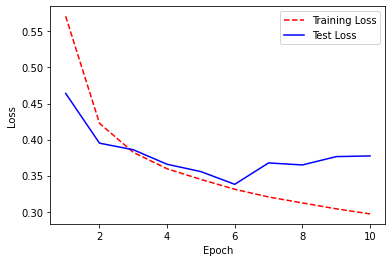

In [ ]:
# Get training and test loss histories
training_loss = h2.history['loss']
test_loss = h2.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

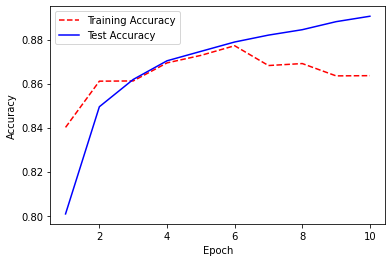

In [ ]:
# Get training and test loss histories
train_accuracy=h2.history['val_accuracy']
test_accuracy=h2.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_3=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h3=model_3.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.6642 - accuracy: 0.7608 - val_loss: 0.4681 - val_accuracy: 0.8351
Epoch 2/10
1688/1688 - 3s - loss: 0.4512 - accuracy: 0.8399 - val_loss: 0.4389 - val_accuracy: 0.8450
Epoch 3/10
1688/1688 - 3s - loss: 0.4145 - accuracy: 0.8533 - val_loss: 0.4152 - val_accuracy: 0.8554
Epoch 4/10
1688/1688 - 3s - loss: 0.3969 - accuracy: 0.8593 - val_loss: 0.3912 - val_accuracy: 0.8620
Epoch 5/10
1688/1688 - 3s - loss: 0.3816 - accuracy: 0.8627 - val_loss: 0.3848 - val_accuracy: 0.8654
Epoch 6/10
1688/1688 - 3s - loss: 0.3706 - accuracy: 0.8680 - val_loss: 0.4123 - val_accuracy: 0.8550
Epoch 7/10
1688/1688 - 3s - loss: 0.3597 - accuracy: 0.8699 - val_loss: 0.3848 - val_accuracy: 0.8637
Epoch 8/10
1688/1688 - 3s - loss: 0.3533 - accuracy: 0.8736 - val_loss: 0.3791 - val_accuracy: 0.8645
Epoch 9/10
1688/1688 - 3s - loss: 0.3457 - accuracy: 0.8761 - val_loss: 0.3736 - val_accuracy: 0.8662
Epoch 10/10
1688/1688 - 3s - loss: 0.3405 - accuracy: 0.8780 - val_loss: 0.3759 - 

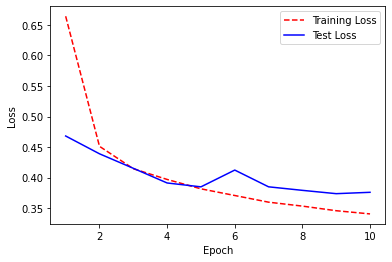

In [ ]:
# Get training and test loss histories
training_loss = h3.history['loss']
test_loss = h3.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

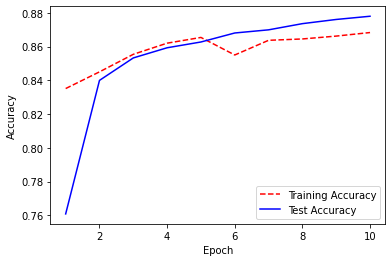

In [ ]:
# Get training and test loss histories
train_accuracy=h3.history['val_accuracy']
test_accuracy=h3.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_4=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h4=model_4.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5878 - accuracy: 0.7897 - val_loss: 0.4211 - val_accuracy: 0.8539
Epoch 2/10
1688/1688 - 3s - loss: 0.4060 - accuracy: 0.8544 - val_loss: 0.4054 - val_accuracy: 0.8536
Epoch 3/10
1688/1688 - 3s - loss: 0.3698 - accuracy: 0.8644 - val_loss: 0.3651 - val_accuracy: 0.8662
Epoch 4/10
1688/1688 - 3s - loss: 0.3462 - accuracy: 0.8747 - val_loss: 0.3566 - val_accuracy: 0.8708
Epoch 5/10
1688/1688 - 3s - loss: 0.3316 - accuracy: 0.8781 - val_loss: 0.3589 - val_accuracy: 0.8701
Epoch 6/10
1688/1688 - 3s - loss: 0.3188 - accuracy: 0.8820 - val_loss: 0.3504 - val_accuracy: 0.8742
Epoch 7/10
1688/1688 - 3s - loss: 0.3090 - accuracy: 0.8855 - val_loss: 0.3317 - val_accuracy: 0.8776
Epoch 8/10
1688/1688 - 3s - loss: 0.2994 - accuracy: 0.8896 - val_loss: 0.3639 - val_accuracy: 0.8666
Epoch 9/10
1688/1688 - 3s - loss: 0.2934 - accuracy: 0.8890 - val_loss: 0.3524 - val_accuracy: 0.8736
Epoch 10/10
1688/1688 - 3s - loss: 0.2870 - accuracy: 0.8920 - val_loss: 0.3247 - 

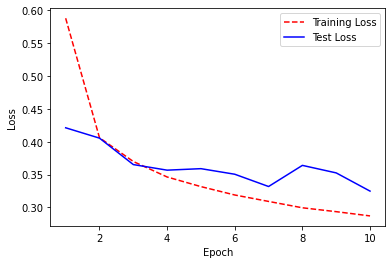

In [ ]:
# Get training and test loss histories
training_loss = h4.history['loss']
test_loss = h4.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

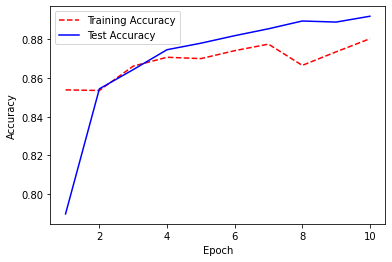

In [ ]:
# Get training and test loss histories
train_accuracy=h4.history['val_accuracy']
test_accuracy=h4.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_5=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h5=model_5.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.7160 - accuracy: 0.7417 - val_loss: 0.5110 - val_accuracy: 0.8170
Epoch 2/10
1688/1688 - 3s - loss: 0.4914 - accuracy: 0.8263 - val_loss: 0.4685 - val_accuracy: 0.8321
Epoch 3/10
1688/1688 - 3s - loss: 0.4523 - accuracy: 0.8383 - val_loss: 0.4533 - val_accuracy: 0.8384
Epoch 4/10
1688/1688 - 3s - loss: 0.4311 - accuracy: 0.8470 - val_loss: 0.4180 - val_accuracy: 0.8500
Epoch 5/10
1688/1688 - 3s - loss: 0.4137 - accuracy: 0.8518 - val_loss: 0.4288 - val_accuracy: 0.8475
Epoch 6/10
1688/1688 - 3s - loss: 0.3987 - accuracy: 0.8571 - val_loss: 0.4008 - val_accuracy: 0.8537
Epoch 7/10
1688/1688 - 3s - loss: 0.3863 - accuracy: 0.8607 - val_loss: 0.3910 - val_accuracy: 0.8610
Epoch 8/10
1688/1688 - 3s - loss: 0.3772 - accuracy: 0.8641 - val_loss: 0.4010 - val_accuracy: 0.8556
Epoch 9/10
1688/1688 - 3s - loss: 0.3675 - accuracy: 0.8679 - val_loss: 0.3987 - val_accuracy: 0.8590
Epoch 10/10
1688/1688 - 3s - loss: 0.3610 - accuracy: 0.8681 - val_loss: 0.3670 - 

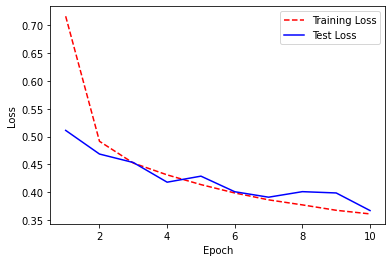

In [ ]:
# Get training and test loss histories
training_loss = h5.history['loss']
test_loss = h5.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

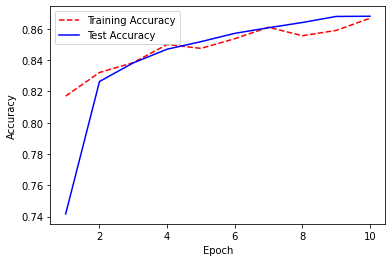

In [ ]:
# Get training and test loss histories
train_accuracy=h5.history['val_accuracy']
test_accuracy=h5.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_6=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h6=model_6.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5852 - accuracy: 0.7900 - val_loss: 0.4565 - val_accuracy: 0.8313
Epoch 2/10
1688/1688 - 3s - loss: 0.4161 - accuracy: 0.8489 - val_loss: 0.4198 - val_accuracy: 0.8470
Epoch 3/10
1688/1688 - 3s - loss: 0.3808 - accuracy: 0.8602 - val_loss: 0.3686 - val_accuracy: 0.8682
Epoch 4/10
1688/1688 - 3s - loss: 0.3560 - accuracy: 0.8691 - val_loss: 0.3648 - val_accuracy: 0.8668
Epoch 5/10
1688/1688 - 3s - loss: 0.3405 - accuracy: 0.8751 - val_loss: 0.3668 - val_accuracy: 0.8658
Epoch 6/10
1688/1688 - 3s - loss: 0.3300 - accuracy: 0.8785 - val_loss: 0.3867 - val_accuracy: 0.8624
Epoch 7/10
1688/1688 - 3s - loss: 0.3205 - accuracy: 0.8816 - val_loss: 0.3403 - val_accuracy: 0.8712
Epoch 8/10
1688/1688 - 3s - loss: 0.3109 - accuracy: 0.8853 - val_loss: 0.3680 - val_accuracy: 0.8712
Epoch 9/10
1688/1688 - 3s - loss: 0.3059 - accuracy: 0.8871 - val_loss: 0.3853 - val_accuracy: 0.8525
Epoch 10/10
1688/1688 - 3s - loss: 0.2960 - accuracy: 0.8889 - val_loss: 0.3354 - 

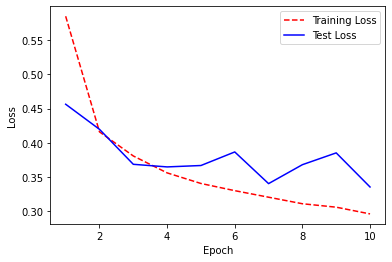

In [ ]:
# Get training and test loss histories
training_loss = h6.history['loss']
test_loss = h6.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

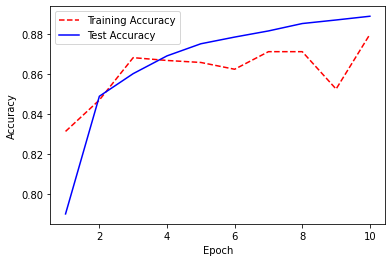

In [ ]:
# Get training and test loss histories
train_accuracy=h6.history['val_accuracy']
test_accuracy=h6.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_7=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_7.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h7=model_7.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.6491 - accuracy: 0.7742 - val_loss: 0.4742 - val_accuracy: 0.8369
Epoch 2/10
1688/1688 - 3s - loss: 0.4510 - accuracy: 0.8408 - val_loss: 0.4341 - val_accuracy: 0.8473
Epoch 3/10
1688/1688 - 3s - loss: 0.4124 - accuracy: 0.8550 - val_loss: 0.4204 - val_accuracy: 0.8540
Epoch 4/10
1688/1688 - 3s - loss: 0.3932 - accuracy: 0.8601 - val_loss: 0.4126 - val_accuracy: 0.8527
Epoch 5/10
1688/1688 - 3s - loss: 0.3733 - accuracy: 0.8658 - val_loss: 0.3946 - val_accuracy: 0.8651
Epoch 6/10
1688/1688 - 3s - loss: 0.3612 - accuracy: 0.8714 - val_loss: 0.3821 - val_accuracy: 0.8654
Epoch 7/10
1688/1688 - 3s - loss: 0.3502 - accuracy: 0.8739 - val_loss: 0.3927 - val_accuracy: 0.8573
Epoch 8/10
1688/1688 - 3s - loss: 0.3435 - accuracy: 0.8747 - val_loss: 0.3585 - val_accuracy: 0.8721
Epoch 9/10
1688/1688 - 3s - loss: 0.3361 - accuracy: 0.8772 - val_loss: 0.3664 - val_accuracy: 0.8694
Epoch 10/10
1688/1688 - 3s - loss: 0.3309 - accuracy: 0.8800 - val_loss: 0.3703 - 

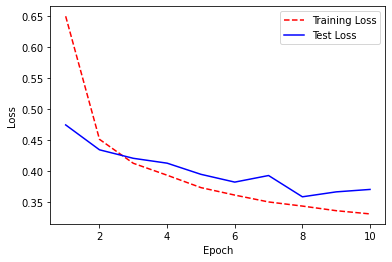

In [ ]:
# Get training and test loss histories
training_loss = h7.history['loss']
test_loss = h7.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

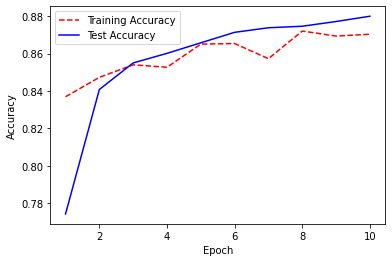

In [ ]:
# Get training and test loss histories
train_accuracy=h7.history['val_accuracy']
test_accuracy=h7.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2** 
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence**

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_8=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_8.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h8=model_8.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5576 - accuracy: 0.8064 - val_loss: 0.4390 - val_accuracy: 0.8486
Epoch 2/10
1688/1688 - 3s - loss: 0.4154 - accuracy: 0.8505 - val_loss: 0.4273 - val_accuracy: 0.8431
Epoch 3/10
1688/1688 - 3s - loss: 0.3820 - accuracy: 0.8606 - val_loss: 0.3820 - val_accuracy: 0.8607
Epoch 4/10
1688/1688 - 3s - loss: 0.3600 - accuracy: 0.8685 - val_loss: 0.3580 - val_accuracy: 0.8715
Epoch 5/10
1688/1688 - 3s - loss: 0.3441 - accuracy: 0.8741 - val_loss: 0.3833 - val_accuracy: 0.8596
Epoch 6/10
1688/1688 - 3s - loss: 0.3321 - accuracy: 0.8790 - val_loss: 0.3519 - val_accuracy: 0.8695
Epoch 7/10
1688/1688 - 3s - loss: 0.3191 - accuracy: 0.8835 - val_loss: 0.3390 - val_accuracy: 0.8774
Epoch 8/10
1688/1688 - 3s - loss: 0.3090 - accuracy: 0.8866 - val_loss: 0.3371 - val_accuracy: 0.8763
Epoch 9/10
1688/1688 - 3s - loss: 0.3010 - accuracy: 0.8901 - val_loss: 0.3477 - val_accuracy: 0.8777
Epoch 10/10
1688/1688 - 3s - loss: 0.2948 - accuracy: 0.8906 - val_loss: 0.3308 - 

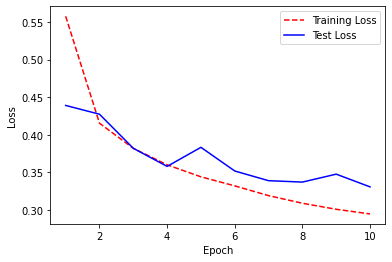

In [ ]:
# Get training and test loss histories
training_loss = h8.history['loss']
test_loss = h8.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

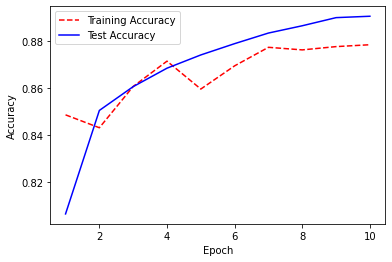

In [ ]:
# Get training and test loss histories
train_accuracy=h8.history['val_accuracy']
test_accuracy=h8.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_9=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_9.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h9=model_9.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.6696 - accuracy: 0.7577 - val_loss: 0.4980 - val_accuracy: 0.8245
Epoch 2/10
1688/1688 - 3s - loss: 0.4590 - accuracy: 0.8368 - val_loss: 0.4534 - val_accuracy: 0.8365
Epoch 3/10
1688/1688 - 3s - loss: 0.4182 - accuracy: 0.8508 - val_loss: 0.4484 - val_accuracy: 0.8418
Epoch 4/10
1688/1688 - 3s - loss: 0.3934 - accuracy: 0.8588 - val_loss: 0.4061 - val_accuracy: 0.8566
Epoch 5/10
1688/1688 - 3s - loss: 0.3769 - accuracy: 0.8633 - val_loss: 0.4076 - val_accuracy: 0.8528
Epoch 6/10
1688/1688 - 3s - loss: 0.3665 - accuracy: 0.8673 - val_loss: 0.3780 - val_accuracy: 0.8632
Epoch 7/10
1688/1688 - 3s - loss: 0.3544 - accuracy: 0.8716 - val_loss: 0.3804 - val_accuracy: 0.8675
Epoch 8/10
1688/1688 - 3s - loss: 0.3460 - accuracy: 0.8740 - val_loss: 0.3773 - val_accuracy: 0.8661
Epoch 9/10
1688/1688 - 3s - loss: 0.3404 - accuracy: 0.8749 - val_loss: 0.3829 - val_accuracy: 0.8618
Epoch 10/10
1688/1688 - 3s - loss: 0.3341 - accuracy: 0.8771 - val_loss: 0.3683 - 

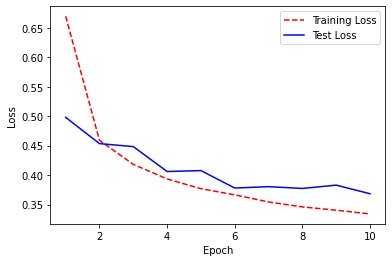

In [ ]:
# Get training and test loss histories
training_loss = h9.history['loss']
test_loss = h9.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

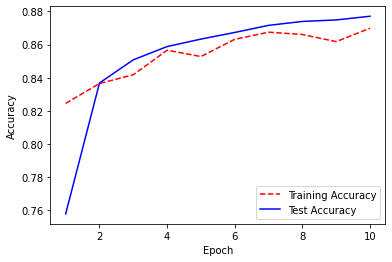

In [ ]:
# Get training and test loss histories
train_accuracy=h9.history['val_accuracy']
test_accuracy=h9.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_10=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_10.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h10=model_10.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 7s - loss: 0.5751 - accuracy: 0.7970 - val_loss: 0.4299 - val_accuracy: 0.8494
Epoch 2/10
1688/1688 - 4s - loss: 0.4188 - accuracy: 0.8499 - val_loss: 0.4155 - val_accuracy: 0.8521
Epoch 3/10
1688/1688 - 3s - loss: 0.3834 - accuracy: 0.8617 - val_loss: 0.3744 - val_accuracy: 0.8658
Epoch 4/10
1688/1688 - 3s - loss: 0.3629 - accuracy: 0.8669 - val_loss: 0.3626 - val_accuracy: 0.8694
Epoch 5/10
1688/1688 - 3s - loss: 0.3449 - accuracy: 0.8727 - val_loss: 0.4014 - val_accuracy: 0.8541
Epoch 6/10
1688/1688 - 3s - loss: 0.3339 - accuracy: 0.8770 - val_loss: 0.3492 - val_accuracy: 0.8696
Epoch 7/10
1688/1688 - 3s - loss: 0.3213 - accuracy: 0.8812 - val_loss: 0.3664 - val_accuracy: 0.8655
Epoch 8/10
1688/1688 - 3s - loss: 0.3120 - accuracy: 0.8834 - val_loss: 0.3293 - val_accuracy: 0.8813
Epoch 9/10
1688/1688 - 3s - loss: 0.2999 - accuracy: 0.8889 - val_loss: 0.3638 - val_accuracy: 0.8708
Epoch 10/10
1688/1688 - 3s - loss: 0.2933 - accuracy: 0.8909 - val_loss: 0.3488 - 

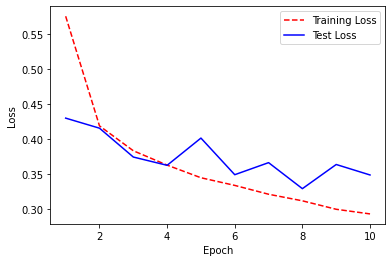

In [ ]:
# Get training and test loss histories
training_loss = h10.history['loss']
test_loss = h10.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

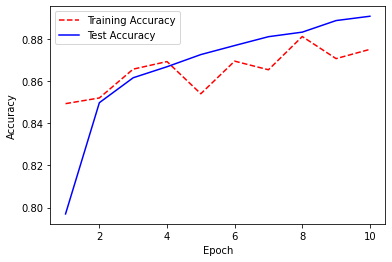

In [ ]:
# Get training and test loss histories
train_accuracy=h10.history['val_accuracy']
test_accuracy=h10.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_11=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_11.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h11=model_11.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.6739 - accuracy: 0.7564 - val_loss: 0.5201 - val_accuracy: 0.8236
Epoch 2/10
1688/1688 - 3s - loss: 0.4715 - accuracy: 0.8348 - val_loss: 0.4533 - val_accuracy: 0.8443
Epoch 3/10
1688/1688 - 3s - loss: 0.4345 - accuracy: 0.8462 - val_loss: 0.4566 - val_accuracy: 0.8365
Epoch 4/10
1688/1688 - 3s - loss: 0.4119 - accuracy: 0.8539 - val_loss: 0.4366 - val_accuracy: 0.8437
Epoch 5/10
1688/1688 - 3s - loss: 0.3946 - accuracy: 0.8609 - val_loss: 0.4021 - val_accuracy: 0.8568
Epoch 6/10
1688/1688 - 3s - loss: 0.3813 - accuracy: 0.8632 - val_loss: 0.3966 - val_accuracy: 0.8567
Epoch 7/10
1688/1688 - 3s - loss: 0.3691 - accuracy: 0.8678 - val_loss: 0.3925 - val_accuracy: 0.8606
Epoch 8/10
1688/1688 - 3s - loss: 0.3596 - accuracy: 0.8702 - val_loss: 0.3804 - val_accuracy: 0.8616
Epoch 9/10
1688/1688 - 3s - loss: 0.3550 - accuracy: 0.8699 - val_loss: 0.3776 - val_accuracy: 0.8660
Epoch 10/10
1688/1688 - 3s - loss: 0.3471 - accuracy: 0.8735 - val_loss: 0.3712 - 

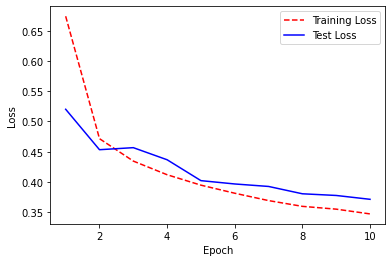

In [ ]:
# Get training and test loss histories
training_loss = h11.history['loss']
test_loss = h11.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

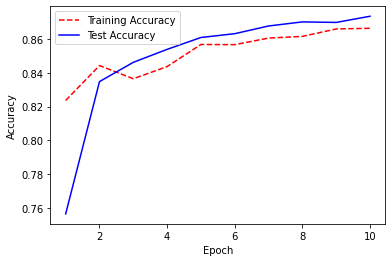

In [ ]:
# Get training and test loss histories
train_accuracy=h11.history['val_accuracy']
test_accuracy=h11.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_12=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_12.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h12=model_12.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5854 - accuracy: 0.7924 - val_loss: 0.4269 - val_accuracy: 0.8495
Epoch 2/10
1688/1688 - 4s - loss: 0.4154 - accuracy: 0.8504 - val_loss: 0.4060 - val_accuracy: 0.8542
Epoch 3/10
1688/1688 - 3s - loss: 0.3777 - accuracy: 0.8620 - val_loss: 0.3771 - val_accuracy: 0.8631
Epoch 4/10
1688/1688 - 4s - loss: 0.3576 - accuracy: 0.8679 - val_loss: 0.3815 - val_accuracy: 0.8585
Epoch 5/10
1688/1688 - 3s - loss: 0.3422 - accuracy: 0.8754 - val_loss: 0.3802 - val_accuracy: 0.8626
Epoch 6/10
1688/1688 - 4s - loss: 0.3286 - accuracy: 0.8800 - val_loss: 0.3551 - val_accuracy: 0.8701
Epoch 7/10
1688/1688 - 4s - loss: 0.3175 - accuracy: 0.8829 - val_loss: 0.3590 - val_accuracy: 0.8699
Epoch 8/10
1688/1688 - 3s - loss: 0.3080 - accuracy: 0.8868 - val_loss: 0.3564 - val_accuracy: 0.8724
Epoch 9/10
1688/1688 - 4s - loss: 0.3004 - accuracy: 0.8887 - val_loss: 0.3578 - val_accuracy: 0.8689
Epoch 10/10
1688/1688 - 3s - loss: 0.2931 - accuracy: 0.8912 - val_loss: 0.3406 - 

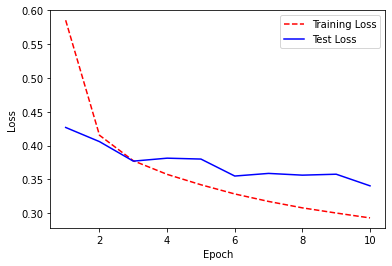

In [ ]:
# Get training and test loss histories
training_loss = h12.history['loss']
test_loss = h12.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

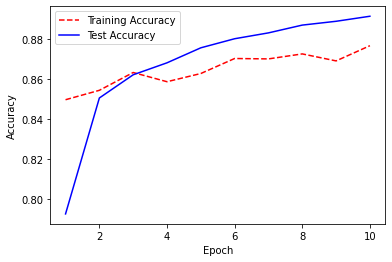

In [ ]:
# Get training and test loss histories
train_accuracy=h12.history['val_accuracy']
test_accuracy=h12.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

# **Sigmoid**

###### **No of hidden layers=2**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_13=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_13.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h13=model_13.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 1.2462 - accuracy: 0.6487 - val_loss: 0.7717 - val_accuracy: 0.7677
Epoch 2/10
1688/1688 - 3s - loss: 0.6261 - accuracy: 0.7992 - val_loss: 0.5448 - val_accuracy: 0.8230
Epoch 3/10
1688/1688 - 3s - loss: 0.4848 - accuracy: 0.8372 - val_loss: 0.4629 - val_accuracy: 0.8444
Epoch 4/10
1688/1688 - 2s - loss: 0.4340 - accuracy: 0.8505 - val_loss: 0.4324 - val_accuracy: 0.8522
Epoch 5/10
1688/1688 - 2s - loss: 0.4090 - accuracy: 0.8570 - val_loss: 0.4194 - val_accuracy: 0.8518
Epoch 6/10
1688/1688 - 3s - loss: 0.3925 - accuracy: 0.8622 - val_loss: 0.4005 - val_accuracy: 0.8608
Epoch 7/10
1688/1688 - 3s - loss: 0.3799 - accuracy: 0.8663 - val_loss: 0.4112 - val_accuracy: 0.8541
Epoch 8/10
1688/1688 - 3s - loss: 0.3707 - accuracy: 0.8688 - val_loss: 0.3958 - val_accuracy: 0.8583
Epoch 9/10
1688/1688 - 2s - loss: 0.3624 - accuracy: 0.8715 - val_loss: 0.3934 - val_accuracy: 0.8623
Epoch 10/10
1688/1688 - 2s - loss: 0.3554 - accuracy: 0.8741 - val_loss: 0.3904 - 

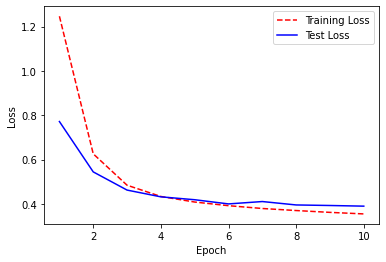

In [ ]:
# Get training and test loss histories
training_loss = h13.history['loss']
test_loss = h13.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


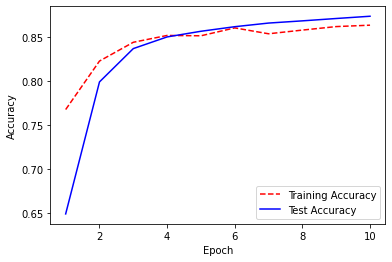

In [ ]:
# Get training and test loss histories
train_accuracy=h13.history['val_accuracy']
test_accuracy=h13.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_14=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_14.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h14=model_14.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.9184 - accuracy: 0.7131 - val_loss: 0.5375 - val_accuracy: 0.8134
Epoch 2/10
1688/1688 - 3s - loss: 0.4714 - accuracy: 0.8357 - val_loss: 0.4365 - val_accuracy: 0.8444
Epoch 3/10
1688/1688 - 3s - loss: 0.4043 - accuracy: 0.8567 - val_loss: 0.4038 - val_accuracy: 0.8553
Epoch 4/10
1688/1688 - 3s - loss: 0.3743 - accuracy: 0.8666 - val_loss: 0.3891 - val_accuracy: 0.8613
Epoch 5/10
1688/1688 - 3s - loss: 0.3565 - accuracy: 0.8724 - val_loss: 0.3726 - val_accuracy: 0.8666
Epoch 6/10
1688/1688 - 3s - loss: 0.3431 - accuracy: 0.8772 - val_loss: 0.3598 - val_accuracy: 0.8695
Epoch 7/10
1688/1688 - 3s - loss: 0.3322 - accuracy: 0.8801 - val_loss: 0.3483 - val_accuracy: 0.8741
Epoch 8/10
1688/1688 - 3s - loss: 0.3228 - accuracy: 0.8831 - val_loss: 0.3509 - val_accuracy: 0.8750
Epoch 9/10
1688/1688 - 3s - loss: 0.3143 - accuracy: 0.8862 - val_loss: 0.3527 - val_accuracy: 0.8722
Epoch 10/10
1688/1688 - 3s - loss: 0.3080 - accuracy: 0.8879 - val_loss: 0.3456 - 

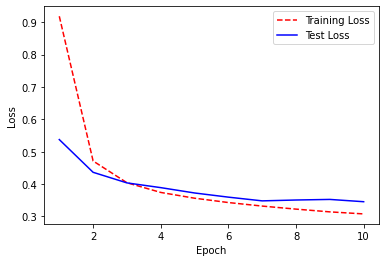

In [ ]:
# Get training and test loss histories
training_loss = h14.history['loss']
test_loss = h14.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


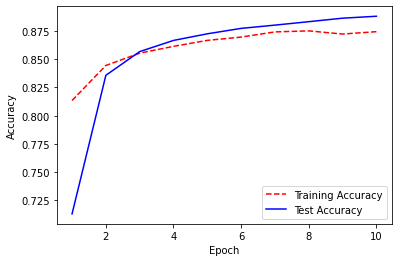

In [ ]:
# Get training and test loss histories
train_accuracy=h14.history['val_accuracy']
test_accuracy=h14.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_15=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_15.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h15=model_15.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 1.4616 - accuracy: 0.5432 - val_loss: 0.8810 - val_accuracy: 0.7412
Epoch 2/10
1688/1688 - 3s - loss: 0.6898 - accuracy: 0.7668 - val_loss: 0.5885 - val_accuracy: 0.7877
Epoch 3/10
1688/1688 - 3s - loss: 0.5434 - accuracy: 0.8062 - val_loss: 0.5177 - val_accuracy: 0.8201
Epoch 4/10
1688/1688 - 3s - loss: 0.4848 - accuracy: 0.8341 - val_loss: 0.4743 - val_accuracy: 0.8399
Epoch 5/10
1688/1688 - 3s - loss: 0.4510 - accuracy: 0.8453 - val_loss: 0.4614 - val_accuracy: 0.8438
Epoch 6/10
1688/1688 - 3s - loss: 0.4317 - accuracy: 0.8517 - val_loss: 0.4441 - val_accuracy: 0.8507
Epoch 7/10
1688/1688 - 3s - loss: 0.4161 - accuracy: 0.8562 - val_loss: 0.4274 - val_accuracy: 0.8528
Epoch 8/10
1688/1688 - 3s - loss: 0.4025 - accuracy: 0.8598 - val_loss: 0.4272 - val_accuracy: 0.8535
Epoch 9/10
1688/1688 - 3s - loss: 0.3926 - accuracy: 0.8641 - val_loss: 0.4250 - val_accuracy: 0.8531
Epoch 10/10
1688/1688 - 3s - loss: 0.3849 - accuracy: 0.8650 - val_loss: 0.4141 - 

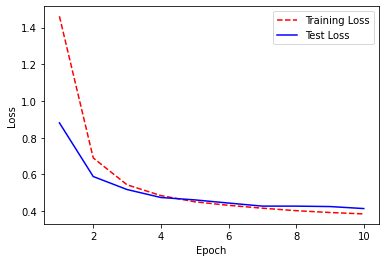

In [ ]:
# Get training and test loss histories
training_loss = h15.history['loss']
test_loss = h15.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


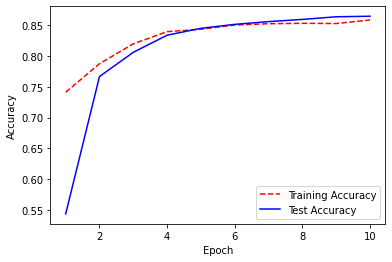

In [ ]:
# Get training and test loss histories
train_accuracy=h15.history['val_accuracy']
test_accuracy=h15.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_16=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h16=model_16.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 1.0744 - accuracy: 0.6566 - val_loss: 0.5756 - val_accuracy: 0.8159
Epoch 2/10
1688/1688 - 3s - loss: 0.4960 - accuracy: 0.8329 - val_loss: 0.4530 - val_accuracy: 0.8438
Epoch 3/10
1688/1688 - 3s - loss: 0.4330 - accuracy: 0.8490 - val_loss: 0.4203 - val_accuracy: 0.8516
Epoch 4/10
1688/1688 - 3s - loss: 0.3993 - accuracy: 0.8607 - val_loss: 0.4105 - val_accuracy: 0.8566
Epoch 5/10
1688/1688 - 3s - loss: 0.3773 - accuracy: 0.8658 - val_loss: 0.3895 - val_accuracy: 0.8601
Epoch 6/10
1688/1688 - 3s - loss: 0.3611 - accuracy: 0.8719 - val_loss: 0.3750 - val_accuracy: 0.8633
Epoch 7/10
1688/1688 - 3s - loss: 0.3477 - accuracy: 0.8760 - val_loss: 0.3723 - val_accuracy: 0.8633
Epoch 8/10
1688/1688 - 3s - loss: 0.3360 - accuracy: 0.8796 - val_loss: 0.3835 - val_accuracy: 0.8599
Epoch 9/10
1688/1688 - 3s - loss: 0.3267 - accuracy: 0.8829 - val_loss: 0.3705 - val_accuracy: 0.8667
Epoch 10/10
1688/1688 - 3s - loss: 0.3179 - accuracy: 0.8866 - val_loss: 0.3541 - 

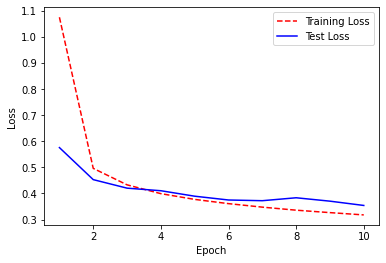

In [ ]:
# Get training and test loss histories
training_loss = h16.history['loss']
test_loss = h16.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


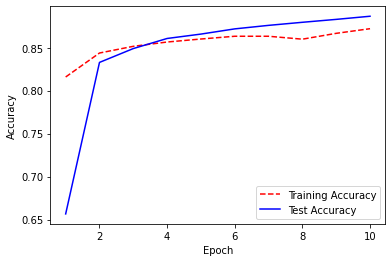

In [ ]:
# Get training and test loss histories
train_accuracy=h16.history['val_accuracy']
test_accuracy=h16.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_17=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_17.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h17=model_17.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 1.6997 - accuracy: 0.3502 - val_loss: 1.1696 - val_accuracy: 0.5882
Epoch 2/10
1688/1688 - 3s - loss: 0.9412 - accuracy: 0.6877 - val_loss: 0.8116 - val_accuracy: 0.7167
Epoch 3/10
1688/1688 - 3s - loss: 0.7330 - accuracy: 0.7388 - val_loss: 0.6885 - val_accuracy: 0.7540
Epoch 4/10
1688/1688 - 3s - loss: 0.6374 - accuracy: 0.7698 - val_loss: 0.6299 - val_accuracy: 0.7561
Epoch 5/10
1688/1688 - 3s - loss: 0.5886 - accuracy: 0.7875 - val_loss: 0.5996 - val_accuracy: 0.7918
Epoch 6/10
1688/1688 - 3s - loss: 0.5531 - accuracy: 0.8037 - val_loss: 0.5516 - val_accuracy: 0.8132
Epoch 7/10
1688/1688 - 3s - loss: 0.5138 - accuracy: 0.8199 - val_loss: 0.5182 - val_accuracy: 0.8191
Epoch 8/10
1688/1688 - 3s - loss: 0.4830 - accuracy: 0.8318 - val_loss: 0.4914 - val_accuracy: 0.8280
Epoch 9/10
1688/1688 - 3s - loss: 0.4586 - accuracy: 0.8421 - val_loss: 0.4746 - val_accuracy: 0.8371
Epoch 10/10
1688/1688 - 3s - loss: 0.4403 - accuracy: 0.8491 - val_loss: 0.4757 - 

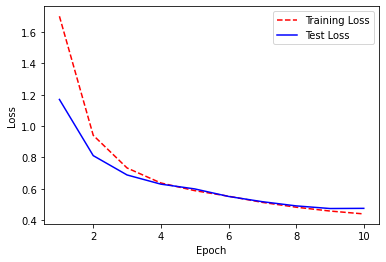

In [ ]:
# Get training and test loss histories
training_loss = h17.history['loss']
test_loss = h17.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


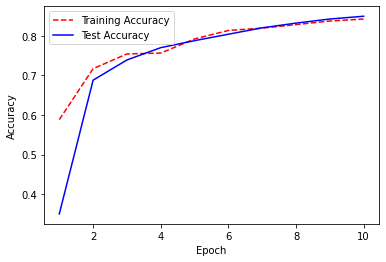

In [ ]:
# Get training and test loss histories
train_accuracy=h17.history['val_accuracy']
test_accuracy=h17.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=Crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_18=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_18.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h18=model_18.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 1.4512 - accuracy: 0.3678 - val_loss: 1.0288 - val_accuracy: 0.5754
Epoch 2/10
1688/1688 - 3s - loss: 0.7707 - accuracy: 0.7131 - val_loss: 0.5954 - val_accuracy: 0.8175
Epoch 3/10
1688/1688 - 3s - loss: 0.5130 - accuracy: 0.8316 - val_loss: 0.4716 - val_accuracy: 0.8457
Epoch 4/10
1688/1688 - 3s - loss: 0.4438 - accuracy: 0.8503 - val_loss: 0.4377 - val_accuracy: 0.8556
Epoch 5/10
1688/1688 - 3s - loss: 0.4157 - accuracy: 0.8586 - val_loss: 0.4571 - val_accuracy: 0.8426
Epoch 6/10
1688/1688 - 3s - loss: 0.3957 - accuracy: 0.8655 - val_loss: 0.4330 - val_accuracy: 0.8549
Epoch 7/10
1688/1688 - 3s - loss: 0.3803 - accuracy: 0.8702 - val_loss: 0.4105 - val_accuracy: 0.8645
Epoch 8/10
1688/1688 - 3s - loss: 0.3698 - accuracy: 0.8732 - val_loss: 0.4045 - val_accuracy: 0.8603
Epoch 9/10
1688/1688 - 3s - loss: 0.3590 - accuracy: 0.8768 - val_loss: 0.3927 - val_accuracy: 0.8699
Epoch 10/10
1688/1688 - 3s - loss: 0.3509 - accuracy: 0.8792 - val_loss: 0.3990 - 

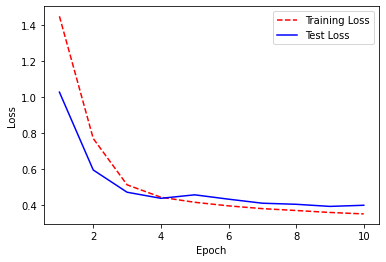

In [ ]:
# Get training and test loss histories
training_loss = h18.history['loss']
test_loss = h18.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


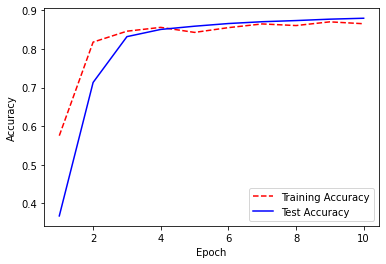

In [ ]:
# Get training and test loss histories
train_accuracy=h18.history['val_accuracy']
test_accuracy=h18.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_19=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_19.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h19=model_19.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 1.2353 - accuracy: 0.6179 - val_loss: 0.7637 - val_accuracy: 0.7661
Epoch 2/10
1688/1688 - 3s - loss: 0.6168 - accuracy: 0.8009 - val_loss: 0.5220 - val_accuracy: 0.8286
Epoch 3/10
1688/1688 - 3s - loss: 0.4821 - accuracy: 0.8361 - val_loss: 0.4559 - val_accuracy: 0.8419
Epoch 4/10
1688/1688 - 3s - loss: 0.4329 - accuracy: 0.8491 - val_loss: 0.4266 - val_accuracy: 0.8534
Epoch 5/10
1688/1688 - 3s - loss: 0.4071 - accuracy: 0.8577 - val_loss: 0.4079 - val_accuracy: 0.8592
Epoch 6/10
1688/1688 - 3s - loss: 0.3887 - accuracy: 0.8633 - val_loss: 0.4175 - val_accuracy: 0.8498
Epoch 7/10
1688/1688 - 3s - loss: 0.3759 - accuracy: 0.8674 - val_loss: 0.3961 - val_accuracy: 0.8594
Epoch 8/10
1688/1688 - 3s - loss: 0.3670 - accuracy: 0.8706 - val_loss: 0.3994 - val_accuracy: 0.8572
Epoch 9/10
1688/1688 - 3s - loss: 0.3573 - accuracy: 0.8733 - val_loss: 0.3802 - val_accuracy: 0.8641
Epoch 10/10
1688/1688 - 3s - loss: 0.3497 - accuracy: 0.8757 - val_loss: 0.3767 - 

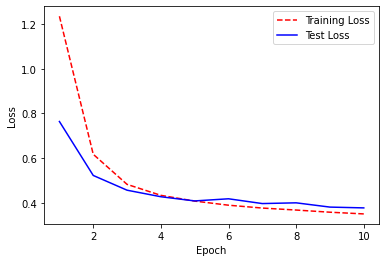

In [ ]:
# Get training and test loss histories
training_loss = h19.history['loss']
test_loss = h19.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

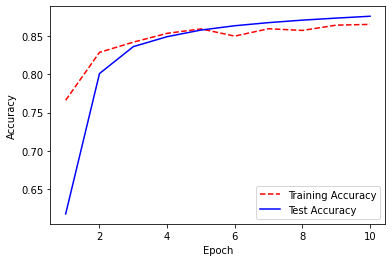

In [ ]:
# Get training and test loss histories
train_accuracy=h19.history['val_accuracy']
test_accuracy=h19.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_20=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_20.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h20=model_20.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.9273 - accuracy: 0.7176 - val_loss: 0.5210 - val_accuracy: 0.8262
Epoch 2/10
1688/1688 - 3s - loss: 0.4656 - accuracy: 0.8379 - val_loss: 0.4231 - val_accuracy: 0.8544
Epoch 3/10
1688/1688 - 3s - loss: 0.4065 - accuracy: 0.8550 - val_loss: 0.3991 - val_accuracy: 0.8598
Epoch 4/10
1688/1688 - 3s - loss: 0.3761 - accuracy: 0.8658 - val_loss: 0.3807 - val_accuracy: 0.8659
Epoch 5/10
1688/1688 - 3s - loss: 0.3545 - accuracy: 0.8733 - val_loss: 0.3733 - val_accuracy: 0.8658
Epoch 6/10
1688/1688 - 3s - loss: 0.3415 - accuracy: 0.8768 - val_loss: 0.3624 - val_accuracy: 0.8695
Epoch 7/10
1688/1688 - 3s - loss: 0.3317 - accuracy: 0.8800 - val_loss: 0.3600 - val_accuracy: 0.8718
Epoch 8/10
1688/1688 - 3s - loss: 0.3216 - accuracy: 0.8828 - val_loss: 0.3521 - val_accuracy: 0.8720
Epoch 9/10
1688/1688 - 3s - loss: 0.3119 - accuracy: 0.8864 - val_loss: 0.3603 - val_accuracy: 0.8721
Epoch 10/10
1688/1688 - 3s - loss: 0.3055 - accuracy: 0.8892 - val_loss: 0.3536 - 

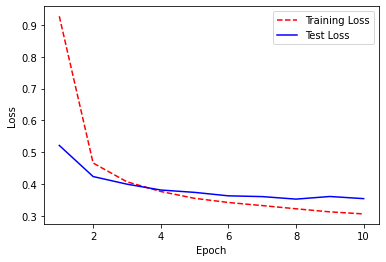

In [ ]:
# Get training and test loss histories
training_loss = h20.history['loss']
test_loss = h20.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

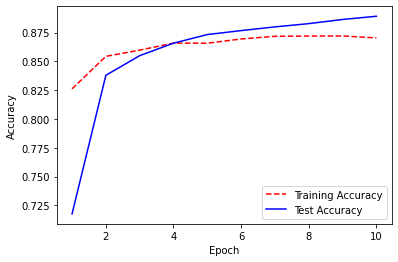

In [ ]:
# Get training and test loss histories
train_accuracy=h20.history['val_accuracy']
test_accuracy=h20.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_21=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_21.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h21=model_21.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 1.4860 - accuracy: 0.4706 - val_loss: 1.0145 - val_accuracy: 0.6354
Epoch 2/10
1688/1688 - 3s - loss: 0.8464 - accuracy: 0.6836 - val_loss: 0.7395 - val_accuracy: 0.7367
Epoch 3/10
1688/1688 - 3s - loss: 0.6384 - accuracy: 0.7743 - val_loss: 0.5875 - val_accuracy: 0.7988
Epoch 4/10
1688/1688 - 3s - loss: 0.5390 - accuracy: 0.8101 - val_loss: 0.5314 - val_accuracy: 0.8208
Epoch 5/10
1688/1688 - 3s - loss: 0.4856 - accuracy: 0.8330 - val_loss: 0.4821 - val_accuracy: 0.8391
Epoch 6/10
1688/1688 - 3s - loss: 0.4465 - accuracy: 0.8477 - val_loss: 0.4575 - val_accuracy: 0.8483
Epoch 7/10
1688/1688 - 3s - loss: 0.4218 - accuracy: 0.8546 - val_loss: 0.4283 - val_accuracy: 0.8558
Epoch 8/10
1688/1688 - 3s - loss: 0.4059 - accuracy: 0.8587 - val_loss: 0.4191 - val_accuracy: 0.8570
Epoch 9/10
1688/1688 - 3s - loss: 0.3920 - accuracy: 0.8620 - val_loss: 0.4186 - val_accuracy: 0.8584
Epoch 10/10
1688/1688 - 3s - loss: 0.3822 - accuracy: 0.8659 - val_loss: 0.4171 - 

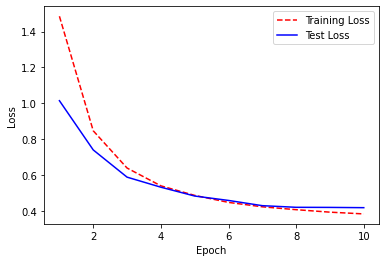

In [ ]:
# Get training and test loss histories
training_loss = h21.history['loss']
test_loss = h21.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

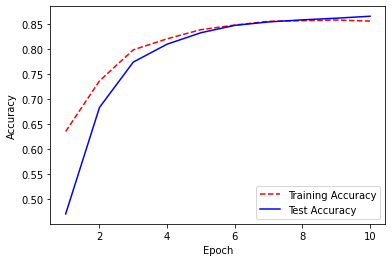

In [ ]:
# Get training and test loss histories
train_accuracy=h21.history['val_accuracy']
test_accuracy=h21.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_22=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_22.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h22=model_22.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 1.0957 - accuracy: 0.6232 - val_loss: 0.5847 - val_accuracy: 0.8041
Epoch 2/10
1688/1688 - 3s - loss: 0.4922 - accuracy: 0.8313 - val_loss: 0.4480 - val_accuracy: 0.8419
Epoch 3/10
1688/1688 - 3s - loss: 0.4148 - accuracy: 0.8549 - val_loss: 0.4085 - val_accuracy: 0.8587
Epoch 4/10
1688/1688 - 3s - loss: 0.3826 - accuracy: 0.8661 - val_loss: 0.3946 - val_accuracy: 0.8593
Epoch 5/10
1688/1688 - 3s - loss: 0.3612 - accuracy: 0.8721 - val_loss: 0.3695 - val_accuracy: 0.8690
Epoch 6/10
1688/1688 - 3s - loss: 0.3464 - accuracy: 0.8772 - val_loss: 0.3604 - val_accuracy: 0.8725
Epoch 7/10
1688/1688 - 3s - loss: 0.3343 - accuracy: 0.8812 - val_loss: 0.3550 - val_accuracy: 0.8738
Epoch 8/10
1688/1688 - 3s - loss: 0.3243 - accuracy: 0.8846 - val_loss: 0.3504 - val_accuracy: 0.8773
Epoch 9/10
1688/1688 - 3s - loss: 0.3152 - accuracy: 0.8876 - val_loss: 0.3565 - val_accuracy: 0.8710
Epoch 10/10
1688/1688 - 3s - loss: 0.3079 - accuracy: 0.8905 - val_loss: 0.3533 - 

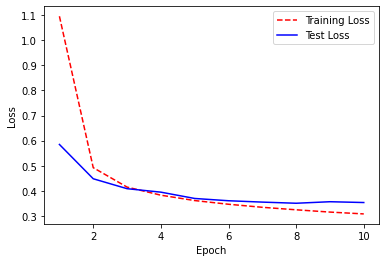

In [ ]:
# Get training and test loss histories
training_loss = h22.history['loss']
test_loss = h22.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

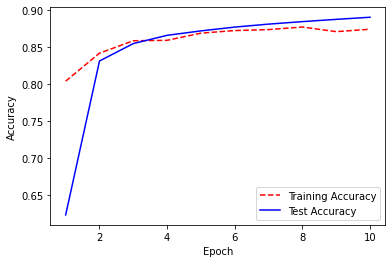

In [ ]:
# Get training and test loss histories
train_accuracy=h22.history['val_accuracy']
test_accuracy=h22.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_23=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_23.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h23=model_23.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 1.7562 - accuracy: 0.2348 - val_loss: 1.4334 - val_accuracy: 0.3113
Epoch 2/10
1688/1688 - 3s - loss: 1.2132 - accuracy: 0.4866 - val_loss: 1.0605 - val_accuracy: 0.5859
Epoch 3/10
1688/1688 - 3s - loss: 0.9317 - accuracy: 0.6275 - val_loss: 0.8527 - val_accuracy: 0.6450
Epoch 4/10
1688/1688 - 3s - loss: 0.8002 - accuracy: 0.6531 - val_loss: 0.7784 - val_accuracy: 0.6615
Epoch 5/10
1688/1688 - 3s - loss: 0.7373 - accuracy: 0.7028 - val_loss: 0.7133 - val_accuracy: 0.7232
Epoch 6/10
1688/1688 - 3s - loss: 0.6651 - accuracy: 0.7389 - val_loss: 0.6534 - val_accuracy: 0.7311
Epoch 7/10
1688/1688 - 3s - loss: 0.6168 - accuracy: 0.7726 - val_loss: 0.6222 - val_accuracy: 0.7835
Epoch 8/10
1688/1688 - 3s - loss: 0.5693 - accuracy: 0.8016 - val_loss: 0.5779 - val_accuracy: 0.8017
Epoch 9/10
1688/1688 - 3s - loss: 0.5323 - accuracy: 0.8118 - val_loss: 0.5626 - val_accuracy: 0.8035
Epoch 10/10
1688/1688 - 3s - loss: 0.5097 - accuracy: 0.8188 - val_loss: 0.5379 - 

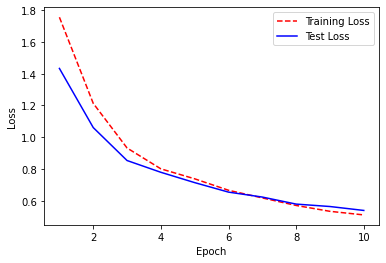

In [ ]:
# Get training and test loss histories
training_loss = h23.history['loss']
test_loss = h23.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

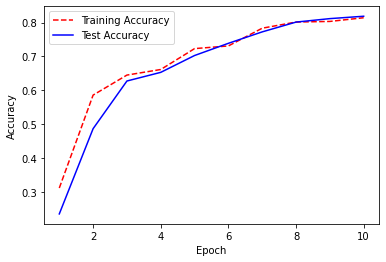

In [ ]:
# Get training and test loss histories
train_accuracy=h23.history['val_accuracy']
test_accuracy=h23.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_24=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(hidden_layer,activation='sigmoid'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_24.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h24=model_24.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 1.1998 - accuracy: 0.5634 - val_loss: 0.7721 - val_accuracy: 0.7102
Epoch 2/10
1688/1688 - 3s - loss: 0.6853 - accuracy: 0.7268 - val_loss: 0.6471 - val_accuracy: 0.7357
Epoch 3/10
1688/1688 - 4s - loss: 0.5832 - accuracy: 0.7724 - val_loss: 0.5559 - val_accuracy: 0.7991
Epoch 4/10
1688/1688 - 4s - loss: 0.4811 - accuracy: 0.8332 - val_loss: 0.4670 - val_accuracy: 0.8400
Epoch 5/10
1688/1688 - 3s - loss: 0.4278 - accuracy: 0.8529 - val_loss: 0.4332 - val_accuracy: 0.8514
Epoch 6/10
1688/1688 - 4s - loss: 0.3979 - accuracy: 0.8620 - val_loss: 0.4160 - val_accuracy: 0.8560
Epoch 7/10
1688/1688 - 3s - loss: 0.3771 - accuracy: 0.8680 - val_loss: 0.3979 - val_accuracy: 0.8603
Epoch 8/10
1688/1688 - 4s - loss: 0.3608 - accuracy: 0.8743 - val_loss: 0.3758 - val_accuracy: 0.8699
Epoch 9/10
1688/1688 - 3s - loss: 0.3471 - accuracy: 0.8790 - val_loss: 0.3815 - val_accuracy: 0.8669
Epoch 10/10
1688/1688 - 3s - loss: 0.3382 - accuracy: 0.8802 - val_loss: 0.3824 - 

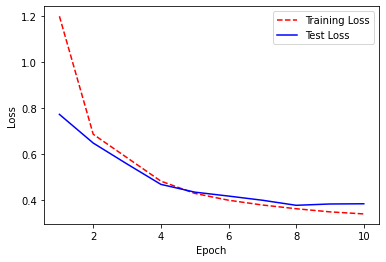

In [ ]:
# Get training and test loss histories
training_loss = h24.history['loss']
test_loss = h24.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

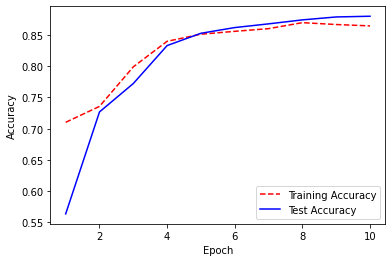

In [ ]:
# Get training and test loss histories
train_accuracy=h24.history['val_accuracy']
test_accuracy=h24.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

# **Tanh**

###### **No of hidden layers=2**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_25=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_25.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h25=model_25.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.6220 - accuracy: 0.8018 - val_loss: 0.4439 - val_accuracy: 0.8459
Epoch 2/10
1688/1688 - 3s - loss: 0.4285 - accuracy: 0.8498 - val_loss: 0.4241 - val_accuracy: 0.8516
Epoch 3/10
1688/1688 - 3s - loss: 0.3943 - accuracy: 0.8617 - val_loss: 0.3963 - val_accuracy: 0.8605
Epoch 4/10
1688/1688 - 3s - loss: 0.3750 - accuracy: 0.8678 - val_loss: 0.3913 - val_accuracy: 0.8651
Epoch 5/10
1688/1688 - 2s - loss: 0.3629 - accuracy: 0.8721 - val_loss: 0.4190 - val_accuracy: 0.8496
Epoch 6/10
1688/1688 - 3s - loss: 0.3523 - accuracy: 0.8751 - val_loss: 0.3835 - val_accuracy: 0.8654
Epoch 7/10
1688/1688 - 3s - loss: 0.3437 - accuracy: 0.8784 - val_loss: 0.3889 - val_accuracy: 0.8631
Epoch 8/10
1688/1688 - 3s - loss: 0.3379 - accuracy: 0.8810 - val_loss: 0.3775 - val_accuracy: 0.8679
Epoch 9/10
1688/1688 - 3s - loss: 0.3309 - accuracy: 0.8827 - val_loss: 0.3686 - val_accuracy: 0.8704
Epoch 10/10
1688/1688 - 3s - loss: 0.3259 - accuracy: 0.8838 - val_loss: 0.3718 - 

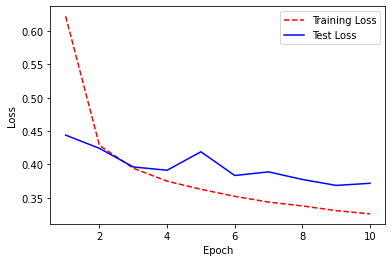

In [ ]:
# Get training and test loss histories
training_loss = h25.history['loss']
test_loss = h25.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

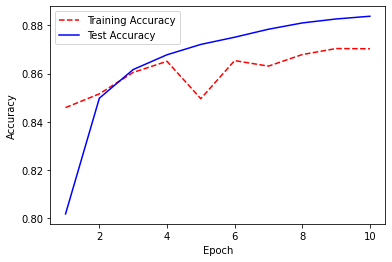

In [ ]:
# Get training and test loss histories
train_accuracy=h25.history['val_accuracy']
test_accuracy=h25.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_26=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_26.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h26=model_26.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.5384 - accuracy: 0.8146 - val_loss: 0.4144 - val_accuracy: 0.8523
Epoch 2/10
1688/1688 - 3s - loss: 0.3944 - accuracy: 0.8567 - val_loss: 0.3836 - val_accuracy: 0.8651
Epoch 3/10
1688/1688 - 3s - loss: 0.3602 - accuracy: 0.8697 - val_loss: 0.3668 - val_accuracy: 0.8676
Epoch 4/10
1688/1688 - 3s - loss: 0.3396 - accuracy: 0.8761 - val_loss: 0.3523 - val_accuracy: 0.8739
Epoch 5/10
1688/1688 - 3s - loss: 0.3270 - accuracy: 0.8812 - val_loss: 0.3548 - val_accuracy: 0.8721
Epoch 6/10
1688/1688 - 3s - loss: 0.3137 - accuracy: 0.8844 - val_loss: 0.3416 - val_accuracy: 0.8796
Epoch 7/10
1688/1688 - 3s - loss: 0.3044 - accuracy: 0.8888 - val_loss: 0.3440 - val_accuracy: 0.8775
Epoch 8/10
1688/1688 - 3s - loss: 0.2938 - accuracy: 0.8914 - val_loss: 0.3395 - val_accuracy: 0.8787
Epoch 9/10
1688/1688 - 3s - loss: 0.2870 - accuracy: 0.8938 - val_loss: 0.3514 - val_accuracy: 0.8733
Epoch 10/10
1688/1688 - 3s - loss: 0.2805 - accuracy: 0.8964 - val_loss: 0.3332 - 

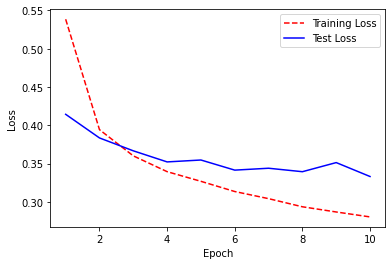

In [ ]:
# Get training and test loss histories
training_loss = h26.history['loss']
test_loss = h26.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

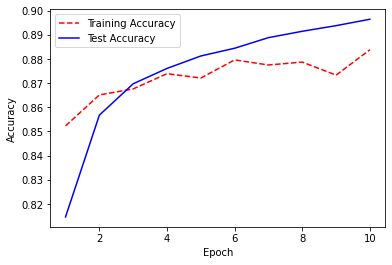

In [ ]:
# Get training and test loss histories
train_accuracy=h26.history['val_accuracy']
test_accuracy=h26.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_27=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_27.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h27=model_27.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.6459 - accuracy: 0.7900 - val_loss: 0.4649 - val_accuracy: 0.8395
Epoch 2/10
1688/1688 - 3s - loss: 0.4324 - accuracy: 0.8454 - val_loss: 0.4159 - val_accuracy: 0.8554
Epoch 3/10
1688/1688 - 3s - loss: 0.3960 - accuracy: 0.8583 - val_loss: 0.4196 - val_accuracy: 0.8482
Epoch 4/10
1688/1688 - 3s - loss: 0.3758 - accuracy: 0.8650 - val_loss: 0.4035 - val_accuracy: 0.8579
Epoch 5/10
1688/1688 - 3s - loss: 0.3619 - accuracy: 0.8697 - val_loss: 0.3915 - val_accuracy: 0.8601
Epoch 6/10
1688/1688 - 3s - loss: 0.3522 - accuracy: 0.8729 - val_loss: 0.3808 - val_accuracy: 0.8633
Epoch 7/10
1688/1688 - 3s - loss: 0.3431 - accuracy: 0.8755 - val_loss: 0.3699 - val_accuracy: 0.8665
Epoch 8/10
1688/1688 - 3s - loss: 0.3356 - accuracy: 0.8783 - val_loss: 0.3742 - val_accuracy: 0.8678
Epoch 9/10
1688/1688 - 3s - loss: 0.3286 - accuracy: 0.8810 - val_loss: 0.3898 - val_accuracy: 0.8576
Epoch 10/10
1688/1688 - 3s - loss: 0.3230 - accuracy: 0.8835 - val_loss: 0.3746 - 

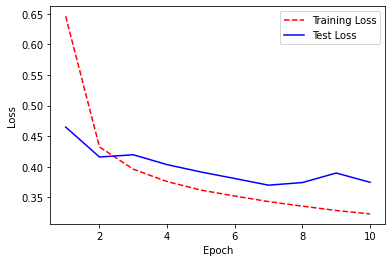

In [ ]:
# Get training and test loss histories
training_loss = h27.history['loss']
test_loss = h27.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

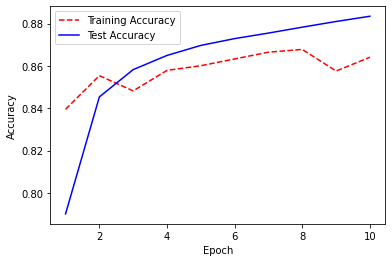

In [ ]:
# Get training and test loss histories
train_accuracy=h27.history['val_accuracy']
test_accuracy=h27.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_28=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_28.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h28=model_28.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5356 - accuracy: 0.8133 - val_loss: 0.4183 - val_accuracy: 0.8483
Epoch 2/10
1688/1688 - 3s - loss: 0.3928 - accuracy: 0.8572 - val_loss: 0.3879 - val_accuracy: 0.8578
Epoch 3/10
1688/1688 - 3s - loss: 0.3587 - accuracy: 0.8695 - val_loss: 0.3773 - val_accuracy: 0.8593
Epoch 4/10
1688/1688 - 3s - loss: 0.3441 - accuracy: 0.8756 - val_loss: 0.3619 - val_accuracy: 0.8697
Epoch 5/10
1688/1688 - 3s - loss: 0.3246 - accuracy: 0.8810 - val_loss: 0.3567 - val_accuracy: 0.8688
Epoch 6/10
1688/1688 - 3s - loss: 0.3144 - accuracy: 0.8850 - val_loss: 0.3661 - val_accuracy: 0.8676
Epoch 7/10
1688/1688 - 3s - loss: 0.3025 - accuracy: 0.8900 - val_loss: 0.3410 - val_accuracy: 0.8738
Epoch 8/10
1688/1688 - 3s - loss: 0.2947 - accuracy: 0.8919 - val_loss: 0.3509 - val_accuracy: 0.8745
Epoch 9/10
1688/1688 - 3s - loss: 0.2864 - accuracy: 0.8938 - val_loss: 0.3382 - val_accuracy: 0.8756
Epoch 10/10
1688/1688 - 3s - loss: 0.2799 - accuracy: 0.8960 - val_loss: 0.3272 - 

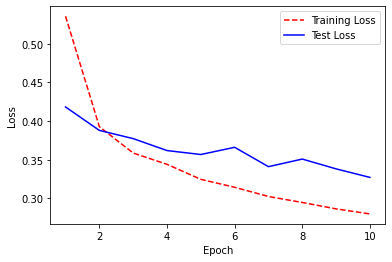

In [ ]:
# Get training and test loss histories
training_loss = h28.history['loss']
test_loss = h28.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

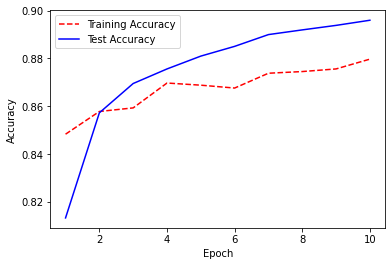

In [ ]:
# Get training and test loss histories
train_accuracy=h28.history['val_accuracy']
test_accuracy=h28.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_29=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_29.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h29=model_29.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.6385 - accuracy: 0.7960 - val_loss: 0.5050 - val_accuracy: 0.8226
Epoch 2/10
1688/1688 - 3s - loss: 0.4349 - accuracy: 0.8486 - val_loss: 0.4245 - val_accuracy: 0.8533
Epoch 3/10
1688/1688 - 3s - loss: 0.4011 - accuracy: 0.8584 - val_loss: 0.3985 - val_accuracy: 0.8609
Epoch 4/10
1688/1688 - 3s - loss: 0.3790 - accuracy: 0.8659 - val_loss: 0.3927 - val_accuracy: 0.8635
Epoch 5/10
1688/1688 - 3s - loss: 0.3662 - accuracy: 0.8684 - val_loss: 0.3822 - val_accuracy: 0.8641
Epoch 6/10
1688/1688 - 3s - loss: 0.3541 - accuracy: 0.8729 - val_loss: 0.3922 - val_accuracy: 0.8595
Epoch 7/10
1688/1688 - 3s - loss: 0.3460 - accuracy: 0.8754 - val_loss: 0.3733 - val_accuracy: 0.8655
Epoch 8/10
1688/1688 - 3s - loss: 0.3372 - accuracy: 0.8786 - val_loss: 0.3732 - val_accuracy: 0.8665
Epoch 9/10
1688/1688 - 3s - loss: 0.3305 - accuracy: 0.8813 - val_loss: 0.3587 - val_accuracy: 0.8743
Epoch 10/10
1688/1688 - 3s - loss: 0.3258 - accuracy: 0.8826 - val_loss: 0.3618 - 

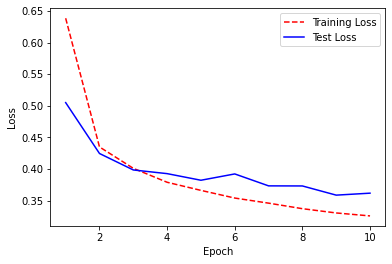

In [ ]:
# Get training and test loss histories
training_loss = h29.history['loss']
test_loss = h29.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

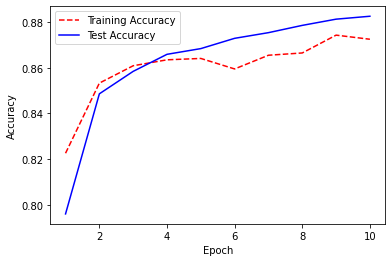

In [ ]:
# Get training and test loss histories
train_accuracy=h29.history['val_accuracy']
test_accuracy=h29.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=crossentropy** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_30=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_30.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs=10

h30=model_30.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5363 - accuracy: 0.8146 - val_loss: 0.4154 - val_accuracy: 0.8489
Epoch 2/10
1688/1688 - 3s - loss: 0.3960 - accuracy: 0.8565 - val_loss: 0.4072 - val_accuracy: 0.8516
Epoch 3/10
1688/1688 - 3s - loss: 0.3612 - accuracy: 0.8677 - val_loss: 0.3786 - val_accuracy: 0.8626
Epoch 4/10
1688/1688 - 3s - loss: 0.3422 - accuracy: 0.8744 - val_loss: 0.3832 - val_accuracy: 0.8593
Epoch 5/10
1688/1688 - 3s - loss: 0.3261 - accuracy: 0.8796 - val_loss: 0.3671 - val_accuracy: 0.8713
Epoch 6/10
1688/1688 - 3s - loss: 0.3164 - accuracy: 0.8841 - val_loss: 0.3624 - val_accuracy: 0.8697
Epoch 7/10
1688/1688 - 3s - loss: 0.3036 - accuracy: 0.8880 - val_loss: 0.3453 - val_accuracy: 0.8775
Epoch 8/10
1688/1688 - 3s - loss: 0.2943 - accuracy: 0.8919 - val_loss: 0.3387 - val_accuracy: 0.8772
Epoch 9/10
1688/1688 - 3s - loss: 0.2869 - accuracy: 0.8952 - val_loss: 0.3315 - val_accuracy: 0.8831
Epoch 10/10
1688/1688 - 3s - loss: 0.2797 - accuracy: 0.8957 - val_loss: 0.3307 - 

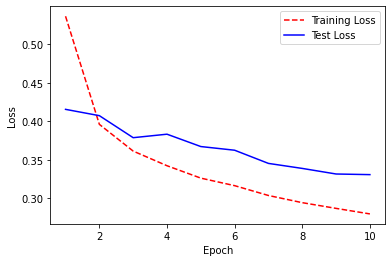

In [ ]:
# Get training and test loss histories
training_loss = h30.history['loss']
test_loss = h30.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

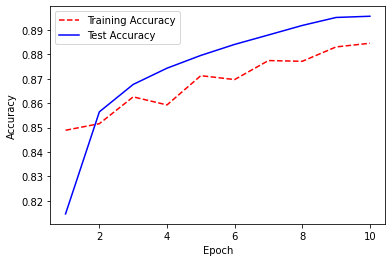

In [ ]:
# Get training and test loss histories
train_accuracy=h30.history['val_accuracy']
test_accuracy=h30.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_31=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_31.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h31=model_31.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.6294 - accuracy: 0.7957 - val_loss: 0.4526 - val_accuracy: 0.8486
Epoch 2/10
1688/1688 - 3s - loss: 0.4294 - accuracy: 0.8479 - val_loss: 0.4044 - val_accuracy: 0.8578
Epoch 3/10
1688/1688 - 3s - loss: 0.3972 - accuracy: 0.8574 - val_loss: 0.3896 - val_accuracy: 0.8618
Epoch 4/10
1688/1688 - 3s - loss: 0.3742 - accuracy: 0.8660 - val_loss: 0.3932 - val_accuracy: 0.8583
Epoch 5/10
1688/1688 - 3s - loss: 0.3623 - accuracy: 0.8700 - val_loss: 0.3804 - val_accuracy: 0.8622
Epoch 6/10
1688/1688 - 3s - loss: 0.3501 - accuracy: 0.8747 - val_loss: 0.4015 - val_accuracy: 0.8561
Epoch 7/10
1688/1688 - 3s - loss: 0.3423 - accuracy: 0.8762 - val_loss: 0.3695 - val_accuracy: 0.8670
Epoch 8/10
1688/1688 - 3s - loss: 0.3340 - accuracy: 0.8797 - val_loss: 0.3786 - val_accuracy: 0.8631
Epoch 9/10
1688/1688 - 3s - loss: 0.3285 - accuracy: 0.8813 - val_loss: 0.3619 - val_accuracy: 0.8684
Epoch 10/10
1688/1688 - 3s - loss: 0.3234 - accuracy: 0.8832 - val_loss: 0.3693 - 

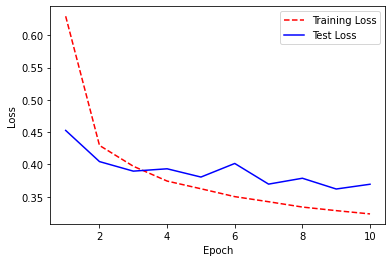

In [ ]:
# Get training and test loss histories
training_loss = h31.history['loss']
test_loss = h31.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

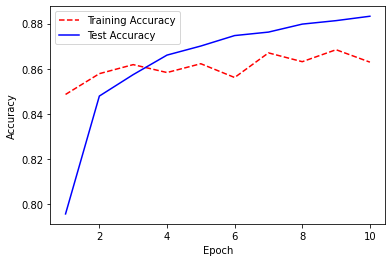

In [ ]:
# Get training and test loss histories
train_accuracy=h31.history['val_accuracy']
test_accuracy=h31.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=2**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_32=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_32.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h32=model_32.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5430 - accuracy: 0.8121 - val_loss: 0.4217 - val_accuracy: 0.8566
Epoch 2/10
1688/1688 - 3s - loss: 0.3930 - accuracy: 0.8586 - val_loss: 0.3751 - val_accuracy: 0.8685
Epoch 3/10
1688/1688 - 3s - loss: 0.3598 - accuracy: 0.8699 - val_loss: 0.3886 - val_accuracy: 0.8564
Epoch 4/10
1688/1688 - 3s - loss: 0.3408 - accuracy: 0.8756 - val_loss: 0.3791 - val_accuracy: 0.8641
Epoch 5/10
1688/1688 - 3s - loss: 0.3244 - accuracy: 0.8820 - val_loss: 0.3597 - val_accuracy: 0.8685
Epoch 6/10
1688/1688 - 3s - loss: 0.3116 - accuracy: 0.8864 - val_loss: 0.3612 - val_accuracy: 0.8699
Epoch 7/10
1688/1688 - 3s - loss: 0.3014 - accuracy: 0.8891 - val_loss: 0.3552 - val_accuracy: 0.8672
Epoch 8/10
1688/1688 - 3s - loss: 0.2918 - accuracy: 0.8931 - val_loss: 0.3496 - val_accuracy: 0.8717
Epoch 9/10
1688/1688 - 3s - loss: 0.2849 - accuracy: 0.8957 - val_loss: 0.3294 - val_accuracy: 0.8818
Epoch 10/10
1688/1688 - 3s - loss: 0.2777 - accuracy: 0.8988 - val_loss: 0.3461 - 

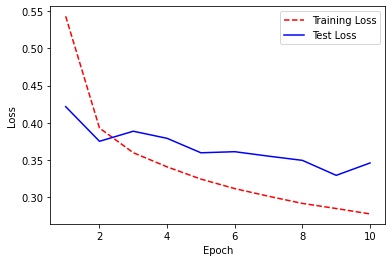

In [ ]:
# Get training and test loss histories
training_loss = h32.history['loss']
test_loss = h32.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

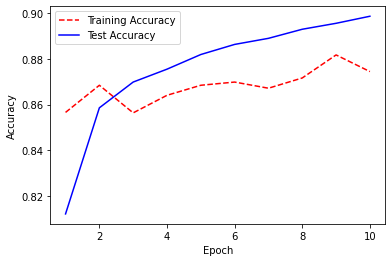

In [ ]:
# Get training and test loss histories
train_accuracy=h32.history['val_accuracy']
test_accuracy=h32.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_33=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_33.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h33=model_33.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 3s - loss: 0.6301 - accuracy: 0.7941 - val_loss: 0.4703 - val_accuracy: 0.8337
Epoch 2/10
1688/1688 - 3s - loss: 0.4273 - accuracy: 0.8499 - val_loss: 0.4119 - val_accuracy: 0.8567
Epoch 3/10
1688/1688 - 3s - loss: 0.3939 - accuracy: 0.8594 - val_loss: 0.3951 - val_accuracy: 0.8636
Epoch 4/10
1688/1688 - 3s - loss: 0.3747 - accuracy: 0.8670 - val_loss: 0.4077 - val_accuracy: 0.8559
Epoch 5/10
1688/1688 - 3s - loss: 0.3596 - accuracy: 0.8714 - val_loss: 0.3971 - val_accuracy: 0.8582
Epoch 6/10
1688/1688 - 3s - loss: 0.3504 - accuracy: 0.8750 - val_loss: 0.3652 - val_accuracy: 0.8706
Epoch 7/10
1688/1688 - 3s - loss: 0.3409 - accuracy: 0.8764 - val_loss: 0.3782 - val_accuracy: 0.8699
Epoch 8/10
1688/1688 - 3s - loss: 0.3328 - accuracy: 0.8803 - val_loss: 0.3680 - val_accuracy: 0.8716
Epoch 9/10
1688/1688 - 3s - loss: 0.3270 - accuracy: 0.8810 - val_loss: 0.3740 - val_accuracy: 0.8670
Epoch 10/10
1688/1688 - 3s - loss: 0.3219 - accuracy: 0.8852 - val_loss: 0.3746 - 

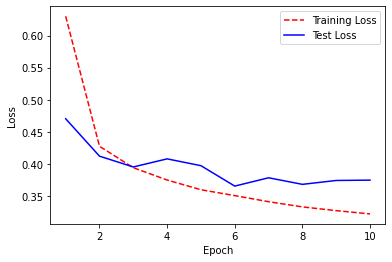

In [ ]:
# Get training and test loss histories
training_loss = h33.history['loss']
test_loss = h33.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

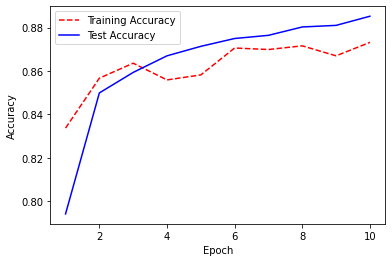

In [ ]:
# Get training and test loss histories
train_accuracy=h33.history['val_accuracy']
test_accuracy=h33.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=3**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_34=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_34.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h34=model_34.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5415 - accuracy: 0.8108 - val_loss: 0.4099 - val_accuracy: 0.8539
Epoch 2/10
1688/1688 - 3s - loss: 0.3921 - accuracy: 0.8582 - val_loss: 0.3933 - val_accuracy: 0.8582
Epoch 3/10
1688/1688 - 3s - loss: 0.3614 - accuracy: 0.8683 - val_loss: 0.3632 - val_accuracy: 0.8676
Epoch 4/10
1688/1688 - 3s - loss: 0.3382 - accuracy: 0.8764 - val_loss: 0.3703 - val_accuracy: 0.8683
Epoch 5/10
1688/1688 - 3s - loss: 0.3268 - accuracy: 0.8810 - val_loss: 0.3431 - val_accuracy: 0.8767
Epoch 6/10
1688/1688 - 3s - loss: 0.3151 - accuracy: 0.8839 - val_loss: 0.3643 - val_accuracy: 0.8712
Epoch 7/10
1688/1688 - 3s - loss: 0.3016 - accuracy: 0.8893 - val_loss: 0.3504 - val_accuracy: 0.8744
Epoch 8/10
1688/1688 - 3s - loss: 0.2973 - accuracy: 0.8914 - val_loss: 0.3345 - val_accuracy: 0.8786
Epoch 9/10
1688/1688 - 3s - loss: 0.2880 - accuracy: 0.8947 - val_loss: 0.3352 - val_accuracy: 0.8794
Epoch 10/10
1688/1688 - 3s - loss: 0.2845 - accuracy: 0.8944 - val_loss: 0.3448 - 

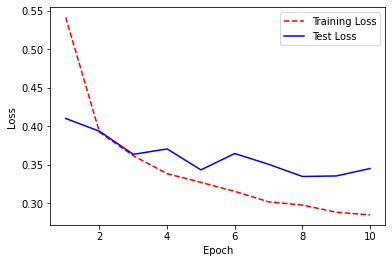

In [ ]:
# Get training and test loss histories
training_loss = h34.history['loss']
test_loss = h34.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

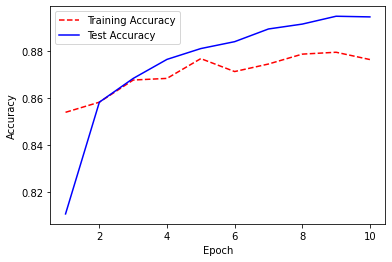

In [ ]:
# Get training and test loss histories
train_accuracy=h34.history['val_accuracy']
test_accuracy=h34.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=16**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=16

model_35=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_35.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h35=model_35.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.6755 - accuracy: 0.7770 - val_loss: 0.4621 - val_accuracy: 0.8458
Epoch 2/10
1688/1688 - 3s - loss: 0.4452 - accuracy: 0.8454 - val_loss: 0.4097 - val_accuracy: 0.8605
Epoch 3/10
1688/1688 - 3s - loss: 0.4061 - accuracy: 0.8567 - val_loss: 0.4229 - val_accuracy: 0.8521
Epoch 4/10
1688/1688 - 3s - loss: 0.3853 - accuracy: 0.8626 - val_loss: 0.3940 - val_accuracy: 0.8578
Epoch 5/10
1688/1688 - 3s - loss: 0.3716 - accuracy: 0.8673 - val_loss: 0.3964 - val_accuracy: 0.8595
Epoch 6/10
1688/1688 - 3s - loss: 0.3573 - accuracy: 0.8713 - val_loss: 0.3745 - val_accuracy: 0.8676
Epoch 7/10
1688/1688 - 3s - loss: 0.3481 - accuracy: 0.8754 - val_loss: 0.3688 - val_accuracy: 0.8697
Epoch 8/10
1688/1688 - 3s - loss: 0.3390 - accuracy: 0.8785 - val_loss: 0.3777 - val_accuracy: 0.8644
Epoch 9/10
1688/1688 - 3s - loss: 0.3332 - accuracy: 0.8796 - val_loss: 0.3823 - val_accuracy: 0.8609
Epoch 10/10
1688/1688 - 3s - loss: 0.3260 - accuracy: 0.8820 - val_loss: 0.3680 - 

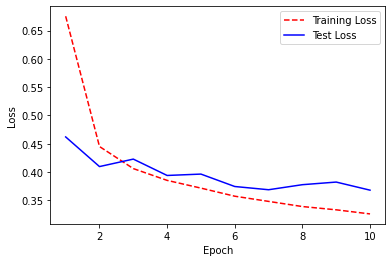

In [ ]:
# Get training and test loss histories
training_loss = h35.history['loss']
test_loss = h35.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

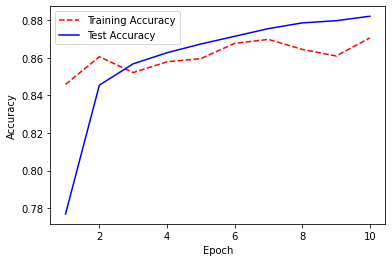

In [ ]:
# Get training and test loss histories
train_accuracy=h35.history['val_accuracy']
test_accuracy=h35.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

###### **No of hidden layers=4**
###### **No of hidden units in each layer=32**
###### **No of Epochs= 10** 
###### **Loss function=KL Divergence** 

In [ ]:
input_layer=784
output_layer=10
hidden_layer=32

model_36=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(hidden_layer,activation='tanh'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

model_36.compile(optimizer='adam',loss='KLDivergence',metrics=['accuracy'])

number_of_epochs=10

h36=model_36.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/10
1688/1688 - 4s - loss: 0.5407 - accuracy: 0.8111 - val_loss: 0.4167 - val_accuracy: 0.8489
Epoch 2/10
1688/1688 - 3s - loss: 0.3943 - accuracy: 0.8562 - val_loss: 0.3714 - val_accuracy: 0.8702
Epoch 3/10
1688/1688 - 4s - loss: 0.3638 - accuracy: 0.8671 - val_loss: 0.3757 - val_accuracy: 0.8677
Epoch 4/10
1688/1688 - 3s - loss: 0.3427 - accuracy: 0.8752 - val_loss: 0.3577 - val_accuracy: 0.8729
Epoch 5/10
1688/1688 - 3s - loss: 0.3301 - accuracy: 0.8793 - val_loss: 0.3560 - val_accuracy: 0.8729
Epoch 6/10
1688/1688 - 4s - loss: 0.3164 - accuracy: 0.8830 - val_loss: 0.3570 - val_accuracy: 0.8704
Epoch 7/10
1688/1688 - 3s - loss: 0.3050 - accuracy: 0.8875 - val_loss: 0.3424 - val_accuracy: 0.8794
Epoch 8/10
1688/1688 - 3s - loss: 0.2977 - accuracy: 0.8905 - val_loss: 0.3445 - val_accuracy: 0.8799
Epoch 9/10
1688/1688 - 4s - loss: 0.2875 - accuracy: 0.8937 - val_loss: 0.3433 - val_accuracy: 0.8760
Epoch 10/10
1688/1688 - 3s - loss: 0.2840 - accuracy: 0.8950 - val_loss: 0.3455 - 

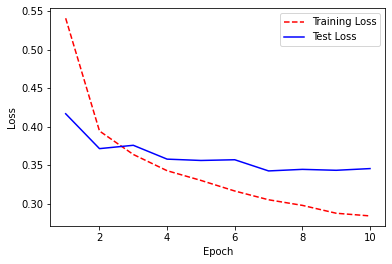

In [ ]:
# Get training and test loss histories
training_loss = h36.history['loss']
test_loss = h36.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')

plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

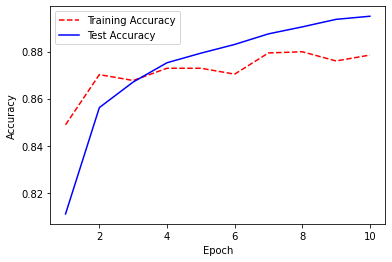

In [ ]:
# Get training and test loss histories
train_accuracy=h36.history['val_accuracy']
test_accuracy=h36.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

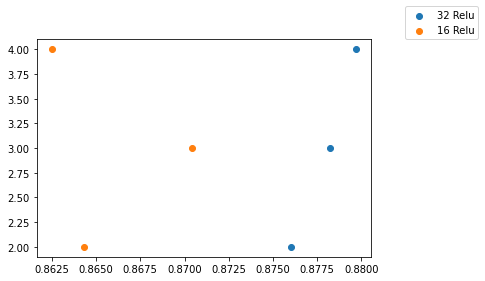

In [ ]:
X1=[0.8643,0.8704,0.8625]
Y=[2,3,4]
X2=[0.8760,0.8782,0.8797]
plt.scatter(X2,Y)
plt.scatter(X1,Y)
plt.legend(['32 Relu','16 Relu'],loc=(1.1,1))

# plt.loc

plt.show()

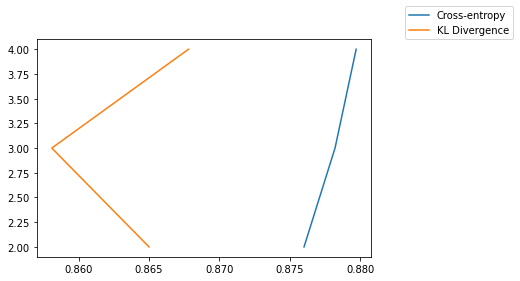

In [ ]:
X3=[0.8760,0.8782,0.8797] #cross
X4=[0.8650,0.8581,0.8678]
Y=[2,3,4]
plt.plot(X3,Y)
plt.plot(X4,Y)
plt.legend(['Cross-entropy','KL Divergence'],loc=(1.1,1))
plt.show()

In [ ]:
# Accuracy Vs Hidden Units
X=[2,4,6]
Y=[0.8527,]